# 📊 Netflix Stock Analysis

Phân tích dữ liệu chứng khoán của Netflix, bao gồm:
- Hợp nhất dữ liệu từ nhiều file CSV
- Làm sạch và chuẩn hóa dữ liệu
- Tính toán các chỉ số tài chính như Daily Return
- Phân tích rủi ro tài chính (VaR, CVaR)
- Trực quan hóa xu hướng giá cổ phiếu


**📌 Import thư viện**


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 📝 Bước 1: Thu thập dữ liệu (Data Collection)
Hợp nhất nhiều file CSV thành một file `raw_data.csv`


In [42]:
def merge_stock_files(file_paths, output_file):
    df_list = []
    for file in file_paths:
        df = pd.read_csv(file)
        df.columns = df.columns.str.strip().str.lower()
        df_list.append(df)
    merged_df = pd.concat(df_list, ignore_index=True)
    merged_df.to_csv(output_file, index=False)
    return merged_df

file_paths = [
    "NFLX_2002-05-23_2025-03-02 (1).csv",
    "NFLX_2002-05-23_2025-02-24.csv",
    "NFLX_2002-05-23_2025-02-18.csv",
    "NFLX_2002-05-23_2025-02-07.csv",
    "NFLX_2002-05-23_2025-01-31.csv"
]
output_file = "raw_data.csv"

stock_data = merge_stock_files(file_paths, output_file)
stock_data.head()


,date,open,high,low,close,adj close,volume
0,2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


## 🛠️ Bước 2: Chuẩn bị và xử lý dữ liệu
- Kiểm tra sơ bộ dữ liệu
- Loại bỏ giá trị trùng lặp
- Xử lý giá trị bị thiếu
- Chuyển đổi định dạng ngày tháng


In [43]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28601 entries, 0 to 28600
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       28601 non-null  object 
 1   open       28601 non-null  float64
 2   high       28601 non-null  float64
 3   low        28601 non-null  float64
 4   close      28601 non-null  float64
 5   adj close  28601 non-null  float64
 6   volume     28601 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.5+ MB


In [44]:
def prepare_stock_data(df):
    df = df.drop_duplicates()  # Xóa dữ liệu trùng lặp
    df = df.dropna()  # Loại bỏ giá trị bị thiếu
    # Chuyển đổi định dạng ngày tháng (xử lý lỗi nếu có)
    df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
    
    return df


stock_data = prepare_stock_data(stock_data)
stock_data.head()

C:\Users\lamnh\AppData\Local\Temp\ipykernel_12112\757335793.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')


,date,open,high,low,close,adj close,volume
0,2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


# 📊 Bước 3: Tính toán các chỉ số tài chính - Financial Indicators
- Chỉ số Daily Return thể hiện mức độ thay đổi giá của cổ phiếu theo từng ngày.
- Công thức: (Giá đóng cửa hôm nay - Giá đóng cửa hôm qua) / Giá đóng cửa hôm qua

In [46]:
def calculate_indicators(df):
    df['daily return'] = df['close'].pct_change()
    return df

stock_data = calculate_indicators(stock_data)
stock_data.head()

,date,open,high,low,close,adj close,volume,daily return
0,2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,NaN
1,2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,0.011343
2,2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,-0.043684
3,2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,-0.046297
4,2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,-0.029125


# ⚠️ Bước 4: Phân tích rủi ro tài chính - Risk Analysis
*Chúng ta sẽ sử dụng hai chỉ số phổ biến để đánh giá rủi ro*
- Value at Risk (VaR): Xác định mức lỗ tối đa có thể xảy ra trong một khoảng thời gian nhất định với mức tin cậy nhất định.
- Conditional VaR (CVaR): Đánh giá mức lỗ trung bình khi xảy ra tổn thất lớn hơn mức VaR.


In [47]:
def calculate_risk_metrics(df, confidence_level=0.95):
    df = df.dropna(subset=['daily return']) # => Loại bỏ giá trị rỗng để tránh lỗi
    # Đánh giá độ biến động của cổ phiếu
    mean_return = df['daily return'].mean() # => Tính lợi nhuận trung bình
    std_dev = df['daily return'].std() # =>  Mức độ dao động của cổ phiếu => lớn => dao động mạnh
    var = np.percentile(df['daily return'], (1 - confidence_level) * 100)
    cvar = df['daily return'][df['daily return'] <= var].mean()
    return {
        "Mean Return": mean_return,
        "Standard Deviation": std_dev,
        "Value at Risk (VaR)": var,
        "Conditional VaR (CVaR)": cvar
    }

risk_metrics = calculate_risk_metrics(stock_data)
print("Risk Metrics:", risk_metrics)

Risk Metrics: {'Mean Return': np.float64(0.0017001399044933969), 'Standard Deviation': np.float64(0.03610420507784987), 'Value at Risk (VaR)': np.float64(-0.044619380689897015), 'Conditional VaR (CVaR)': np.float64(-0.0761208059608421)}


**Kết quả nhận được:**  
`Value at Risk (VaR) = -0.0446 (~ -4.46%)`
`Conditional VaR (CVaR) = -0.0761 (~ -7.61%)`

### 📌 Ý nghĩa:
- VaR cho biết mức lỗ tối đa có thể xảy ra với **95% độ tin cậy**.
- Điều này có nghĩa là **trong 95% thời gian**, mức lỗ hàng ngày của cổ phiếu Netflix sẽ **không vượt quá -4.46%**.
- CVaR đo lường mức **tổn thất trung bình** trong **5% trường hợp tệ nhất** của Daily Return.
- Nghĩa là khi giá cổ phiếu giảm vượt quá mức VaR (-4.46%), thì **mức lỗ trung bình trong trường hợp xấu nhất sẽ là -7.61%**.


# 📈 Bước 5: Trực quan hóa dữ liệu - Data Visualization
- Vẽ biểu đồ xu hướng giá cổ phiếu của Netflix theo thời gian
- Trục X là ngày, trục Y là giá đóng cửa (Close Price)

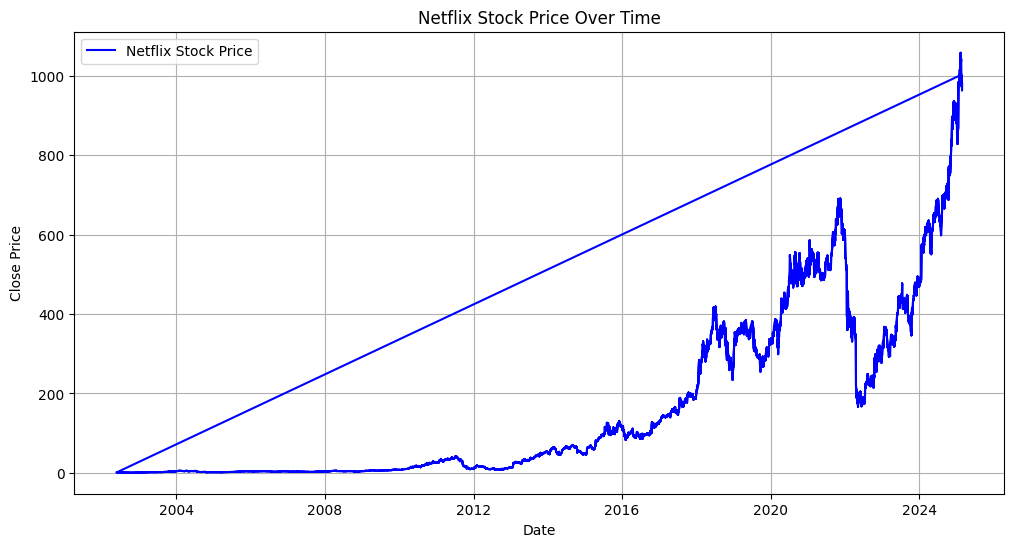

In [28]:
def plot_stock_data(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['close'], label='Netflix Stock Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Netflix Stock Price Over Time')
    plt.legend()
    plt.grid()
    plt.show()

plot_stock_data(stock_data)

# 💾 Bước 6: Lưu kết quả phân tích - Save & Export Data

In [40]:
def save_results(df, output_path="processed_data.csv"):
    df.to_csv(output_path, index=False)
    print(f"Dữ liệu đã được lưu tại: {output_path}")

save_results(stock_data)


Dữ liệu đã được lưu tại: processed_data.csv
